In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load the dataset
file_path = '/content/PCA_results.8.csv'  # Replace with the path to your dataset
data = pd.read_csv(file_path)

In [3]:
# Step 2: Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.274355 -0.096344  1.083427 -0.779993  0.733224  0.499635 -1.212490   
1  3.097952 -0.523544  1.495265 -0.142860  0.683907 -0.164014 -0.978976   
2  3.470452 -0.318442  1.639695 -0.478387  0.878706  0.271496 -0.161314   
3  3.197982 -0.301340  1.534107 -0.769627  0.886398  0.445042 -0.595537   
4  2.916098  0.137352  1.541440 -1.324139  0.369705  0.771748 -1.421975   

        PC8  label  
0  0.127588      1  
1  0.292278      1  
2  0.013030      1  
3  0.384700      1  
4  0.418969      1  


In [4]:
# Step 3: Check for missing values
if data.isnull().sum().sum() > 0:
    print("Missing values detected. Filling with mean values...")
    data.fillna(data.mean(), inplace=True)
else:
    print("No missing values detected.")

No missing values detected.


In [5]:
# Step 4: Separate features and labels
if 'label' in data.columns:
    features = data.drop(columns=['label'])  # Dropping the label column
    labels = data['label']
    print("Features and labels separated successfully.")
else:
    raise KeyError("'label' column not found in the dataset. Please ensure the dataset contains a 'label' column.")

Features and labels separated successfully.


In [6]:
# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (140, 8)
Testing set size: (35, 8)


In [7]:
# Step 6: Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=200)  # Adjust max_iter for convergence
print("Initialized Logistic Regression model.")

Initialized Logistic Regression model.


In [8]:
# Step 7: Train the Logistic Regression model
log_reg.fit(X_train, y_train)
print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


In [9]:
# Step 8: Make predictions on the test set
y_pred = log_reg.predict(X_test)
print("Predictions made on the test set.")

Predictions made on the test set.


In [10]:
# Step 9: Evaluate the Logistic Regression model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nLogistic Regression Model Accuracy: {accuracy:.2f}")


Logistic Regression Model Accuracy: 0.80


In [11]:
# Step 10: Display the classification report
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           2       1.00      0.50      0.67         2
           3       0.86      0.75      0.80         8
           4       1.00      1.00      1.00         2
           5       1.00      0.33      0.50         3
           6       1.00      1.00      1.00         2
           7       0.67      1.00      0.80         2
           8       0.33      1.00      0.50         1
          10       0.00      0.00      0.00         1
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         2
          15       1.00      0.50      0.67         2
          16       0.50      1.00      0.67         2
          18       1.00      1.00      1.00         1

    accuracy                           0.80        35
   macro avg       0.82      0.8

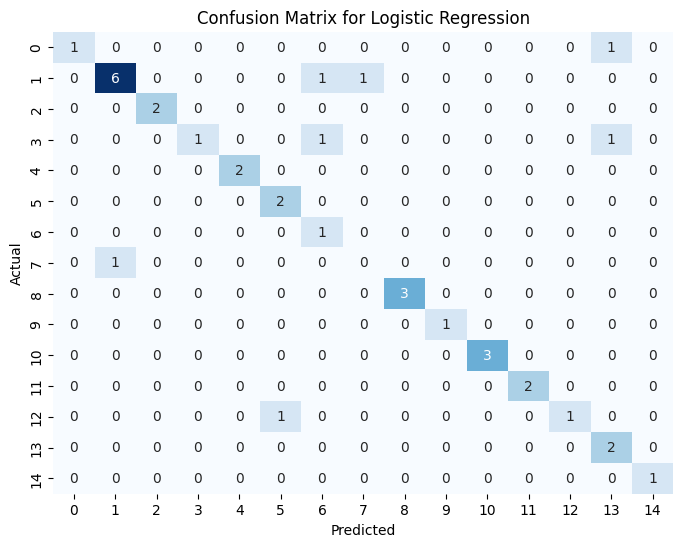

In [12]:
# Step 11: Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()